# Decision tree based models

This week we will use the https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.# diabetes dataset. Our goal is to classify people based on their symptoms if they have diabetes or not.

#### 1. Prepare dataset
 - load the diabetes_data_upload.csv dataset
 - search for missing values and if needed, handle them!
 - encode the non numeric variables into numeric ones! For the binary features simply encode them as (0/1), do not create two separate columns for them!

#### 2. Train & visualize decision tree classifier
 - train a decision tree classifier using the sklearn API
 - use its default parameters
 - for training use all the data, this is only and exploratory task now
 - visualize the decision tree (the `plot_tree` function in sklearn will be helpful)
 - manually check for two cases if the returned Gini impurities are correct
 - in a few sentences discuss the results

#### 3.  Random forest feature importance
 - train a random forest classifier on all the data using the sklearn API
 - use default values again, but fix the random_state to 42!
 - plot the 10 most important features' importances
    - create a bar plot where the height of the bar is the feature importance
    - show the 10 features where the feature importance is the highest
    - `feature_importance` attribute is helpful

#### 4. Evaluation
 - generate prediction probabilities with a decision tree and with a random forest model
 - use 5 fold cross validation for both time (so you should get 520 predictions)
 - use default parameters for both models
 - compare the two models with ROC curves
   - why does the decision tree's ROC curve looks different?
 
#### 5. Tuning model
  - using 80/20% train/test split generate predictions for a random forest model
  - plot the AUC vs number of trees in the forest for both the traing and the test data
  - do we experience overfitting if we use too many trees?


### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

# Preps

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import roc_auc_score

In [3]:
from sklearn.metrics import plot_roc_curve

# Task 1

In [4]:
# Importing the dataset:
df = pd.read_csv('diabetes_data_upload.csv')

In [5]:
# Converting the data into numerical
a = {'Yes':1,'No':0,'Male':0,'Female':1,'Positive':1,'Negative':0}
for column in df.columns[1:]:
    df[column] = df[column].map(lambda x:a[x])
# No missing values

# Task 2


In [6]:
# Creating a classifier object
clf = DecisionTreeClassifier()

In [7]:
# Fitting the classifier object
clf.fit(df[df.columns[0:-1]],df[df.columns[-1]])

DecisionTreeClassifier()

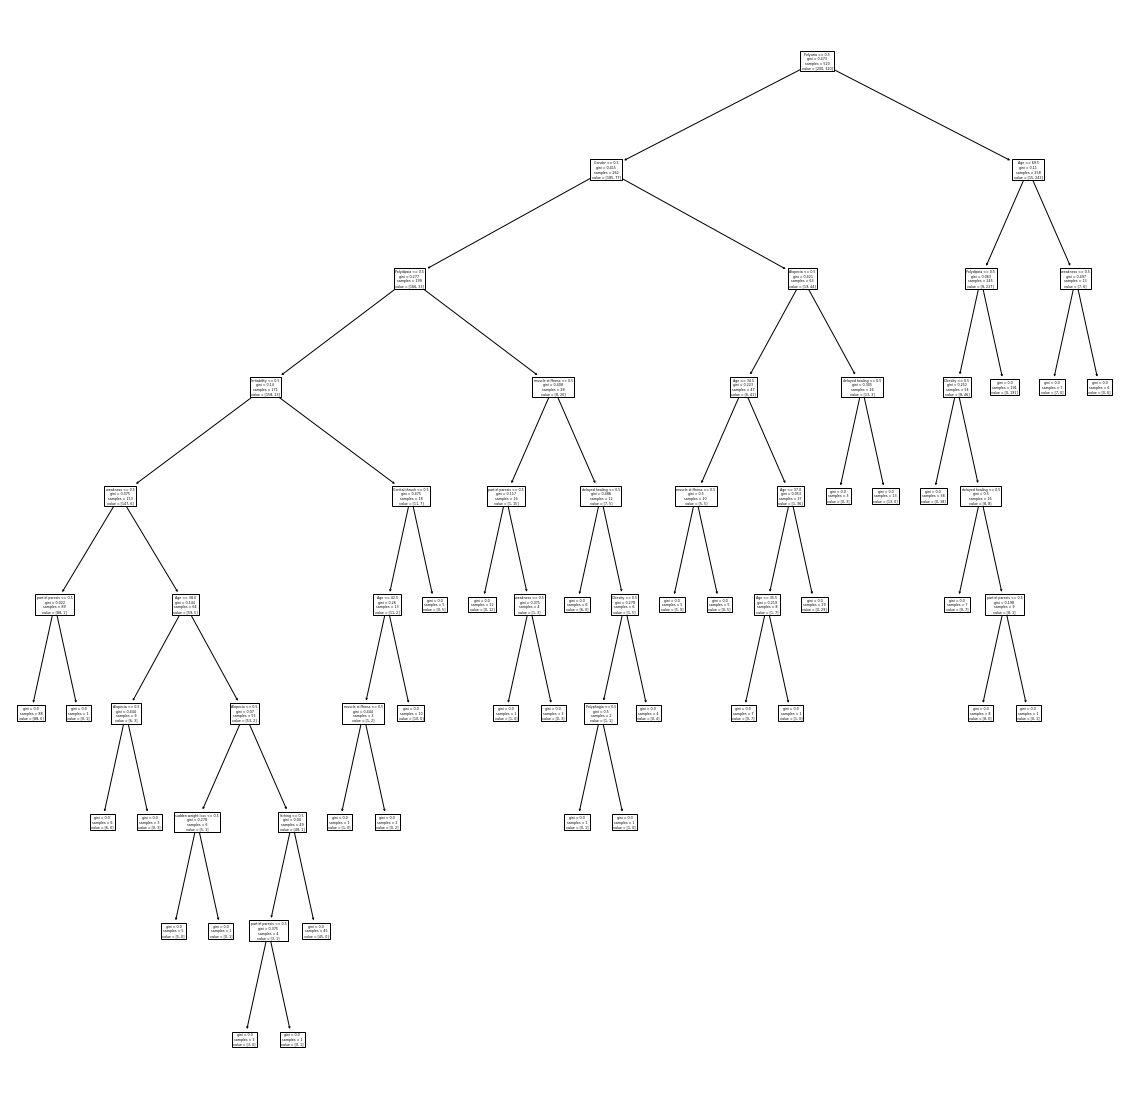

In [8]:
"""
Plotting the decision tree
I know it is hard to in a normal plot in kooplex.
In VSC there is plenty of data viewing extension, so I could zoom in.
I saved an .eps so the results can be zoomed into, by everyone
"""
plt.figure(figsize = (20,20))
plot_tree(clf,feature_names=df.columns)
# For skipping the tons of texts
None
plt.savefig('decisiontree.eps')

In [9]:
check = lambda r1,r2,name:print("The official values for "+ str(name)+" were: " +str(np.round(r1,3))+ ". The manual result were: " +str(np.round(r2,3)))
# Checking the results manually
ref1 = 1-(320/520)**2 - (200/520)**2  
ref2 = 1-(185/262)**2-(77/262)**2
check(0.473,ref1,'Polyuria')
check(0.415,ref2,'Gender')


The official values for Polyuria were: 0.473. The manual result were: 0.473
The official values for Gender were: 0.415. The manual result were: 0.415


As the importance of a feature decreasing, it's Gini impurity is decreesing too. With this tree we can see which features are related.

# Task 3

In [10]:
# Creating and fitting for the random forest
clf_2 = RandomForestClassifier(random_state=42)
clf_2.fit(df[df.columns[0:-1]],df[df.columns[-1]])

RandomForestClassifier(random_state=42)

In [11]:
# Creating the x and y axis for barplot
imp = clf_2.feature_importances_
x_cols = df.columns[:-1]

indexes = np.argsort(imp)

imp = imp[indexes][6:]

x_cols = x_cols[indexes][6:]


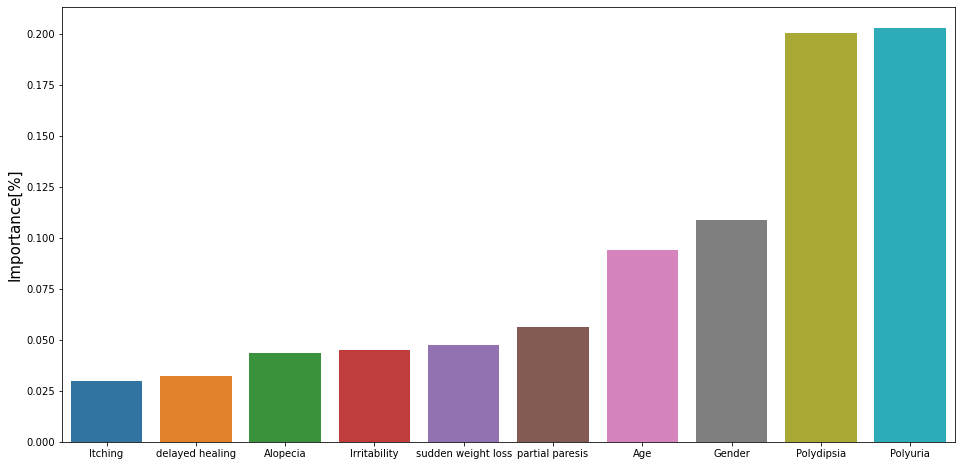

In [12]:
# Plotting the barplot
plt.figure(figsize=(16,8))
ax = sns.barplot(x_cols,imp)
ax.set_ylabel('Importance[%]', fontsize = 15)
plt.show()

# Task 4

In [13]:
# Creating the data for 5 fold cross validation
x = df[df.columns[:-1]].to_numpy()
y = df['class'].to_numpy()

In [14]:
# Creating a k-fold generator
kf = KFold()

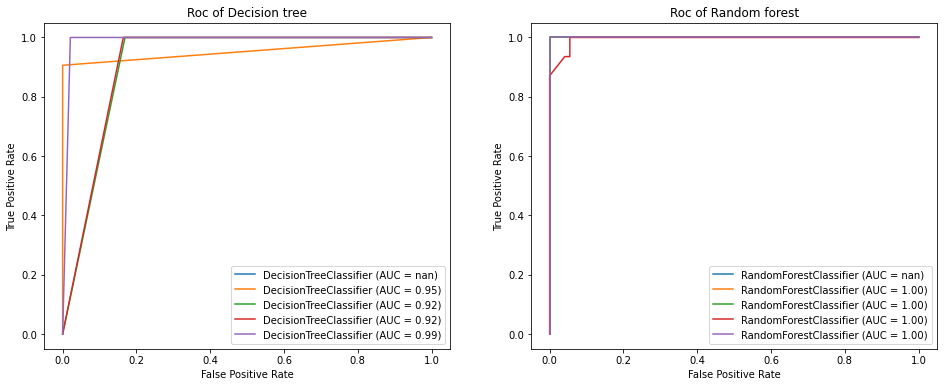

In [15]:
plt.figure(figsize=(16,6))
# Plotting the roc for random forest and decision tree
for train_index,test_index in kf.split(x):
    # Splitting the data
    x_train,x_test = x[train_index], x[test_index]
    y_train,y_test = y[train_index], y[test_index]
    
    #Plot decision tree
    clf.fit(x_train,y_train)
    ax1 = plt.subplot(1,2,1)
    ax1.set_title('Roc of Decision tree')
    plot_roc_curve(clf,x_test,y_test,ax = ax1)
    
    #Plot random forest
    clf_2.fit(x_train,y_train)
    ax2 = plt.subplot(1,2,2)
    ax2.set_title('Roc of Random forest')
    plot_roc_curve(clf_2,x_test,y_test,ax = ax2)

# Task 5

In [16]:
#Prepareing data for task 5
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [17]:
# Placeholders
aucs = []
t = []
# Creating AUC's for different number of trees
for trees in range(1,25):
    t.append(trees)
    clf_3 = RandomForestClassifier(n_estimators=trees,random_state=42)
    clf_3.fit(x_train,y_train)
    y_pred = clf_3.predict_proba(x_test)[:,1]
    aucs.append(roc_auc_score(y_test,y_pred)  ) 

Text(0.5, 1.0, 'AUC vs number of trees in random forest model')

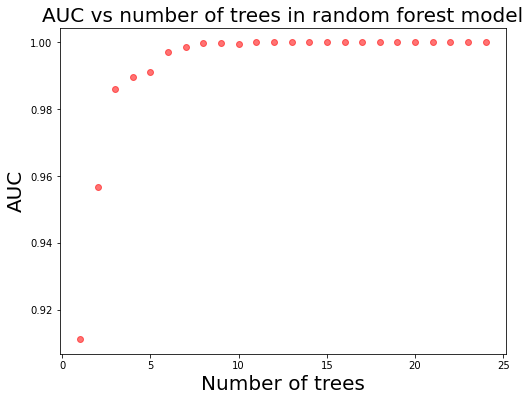

In [18]:
# Plotting the AUC's for different number of trees
plt.figure(figsize = (8,6))
plt.plot(t,aucs, 'ro', alpha = 0.55)
plt.xlabel('Number of trees', fontsize = 20)
plt.ylabel('AUC', fontsize = 20)
plt.title('AUC vs number of trees in random forest model',fontsize = 20)

Yes, we experience the overfitting, if we use too many trees